In [2]:
import requests
url ="https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt"
fetched_data=requests.get(url)

In [3]:
text=fetched_data.text

In [4]:
print(text)

The Project Gutenberg EBook of The Adventures of Sherlock Holmes
by Sir Arthur Conan Doyle
(#15 in our series by Sir Arthur Conan Doyle)

Copyright laws are changing all over the world. Be sure to check the
copyright laws for your country before downloading or redistributing
this or any other Project Gutenberg eBook.

This header should be the first thing seen when viewing this Project
Gutenberg file.  Please do not remove it.  Do not change or edit the
header without written permission.

Please read the "legal small print," and other information about the
eBook and Project Gutenberg at the bottom of this file.  Included is
important information about your specific rights and restrictions in
how the file may be used.  You can also find out about how to make a
donation to Project Gutenberg, and how to get involved.


**Welcome To The World of Free Plain Vanilla Electronic Texts**

**eBooks Readable By Both Humans and By Computers, Since 1971**

*****These eBooks Were Prepared By Thousan

In [5]:
import re

cleaning

In [6]:
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # keep only letters and space
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # remove extra spaces
cleaned_text = cleaned_text.lower()

In [7]:
print(len(cleaned_text))

6166262


In [8]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
tokens = cleaned_text.split()

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Step 5: Apply stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
word_freq = Counter(stemmed_tokens)
print("Top 10 frequent words:")
print(word_freq.most_common(10))


Top 10 frequent words:
[('said', 3456), ('one', 3354), ('may', 2538), ('pierr', 1952), ('would', 1949), ('princ', 1945), ('look', 1859), ('time', 1749), ('could', 1695), ('state', 1661)]


# `Audio Processing`

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [13]:
url = "https://github.com/Jakobovski/free-spoken-digit-dataset/raw/master/recordings/0_george_0.wav"
filename = "audio.wav"

In [14]:
import requests
with open(filename, 'wb') as f:
    f.write(requests.get(url).content)

In [15]:
signal, sr = librosa.load(filename, sr=None)

In [16]:
signal = signal / max(abs(signal))

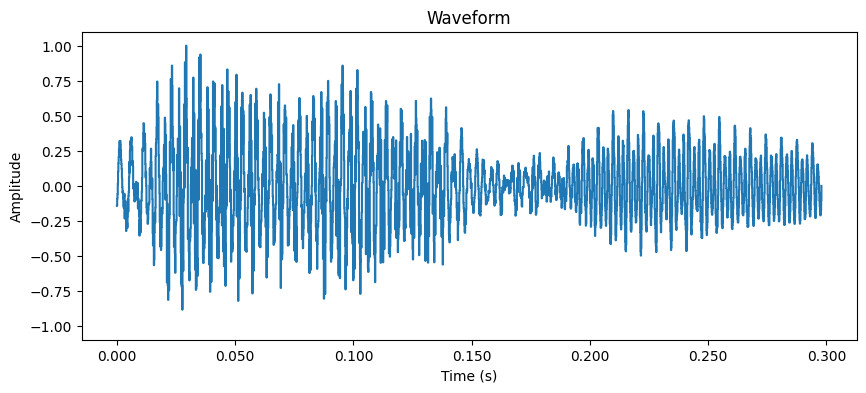

In [17]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

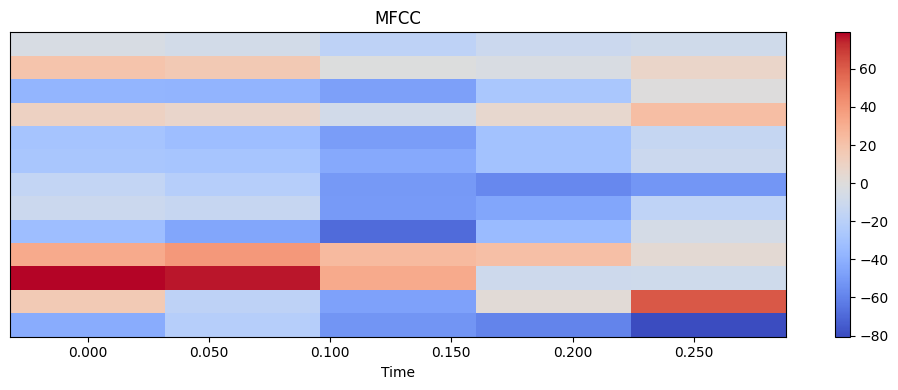

In [18]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title("MFCC")
plt.colorbar()
plt.tight_layout()
plt.show()

# Video Processing


In [24]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow



In [25]:
video_url = "https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4"
filename = "video.mp4"
urllib.request.urlretrieve(video_url, filename)


('video.mp4', <http.client.HTTPMessage at 0x7c5ccfe8ff10>)

In [26]:
cap = cv2.VideoCapture(filename)
frame_count = 0

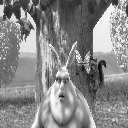

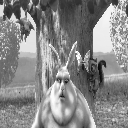

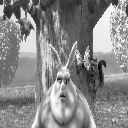

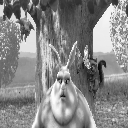

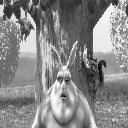

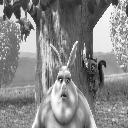

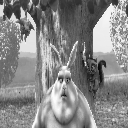

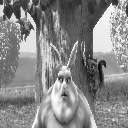

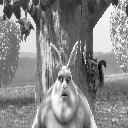

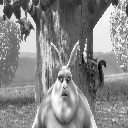

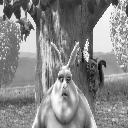

In [27]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count > 10:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (128, 128))


    cv2_imshow(resized)

    frame_count += 1

cap.release()